In [68]:
## LIbrary setting
import cognitive_face as CF
import configparser
import requests
import io
from io import BytesIO
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
from urllib import urlopen

%matplotlib inline

In [37]:
## Read config file for Subscription key
inifile = configparser.ConfigParser()
inifile.read_file(open('./config.ini'))

In [70]:
## Set subscription key
KEY = inifile.get('setting', 'SUBSCRIPTION_KEY')
CF.Key.set(KEY)

## Set endpoint. Please change it if you need.
BASE_URL = 'https://southeastasia.api.cognitive.microsoft.com/face/v1.0/'  # Replace with your regional Base URL
CF.BaseUrl.set(BASE_URL)

# You can use this example JPG or replace the URL below with your own URL to a JPEG image.
img_url = 'https://raw.githubusercontent.com/Microsoft/Cognitive-Face-Windows/master/Data/detection1.jpg'

## Use "Detect" 
faces = CF.face.detect(img_url)
print(faces)

[{u'faceId': u'4785daf3-66ab-448d-8fb7-84510a94d57e', u'faceRectangle': {u'width': 227, u'top': 124, u'height': 227, u'left': 459}}]


C:\Users\kyiwasak\AppData\Local\Continuum\Anaconda2\lib\site-packages\requests\packages\urllib3\connectionpool.py:821: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


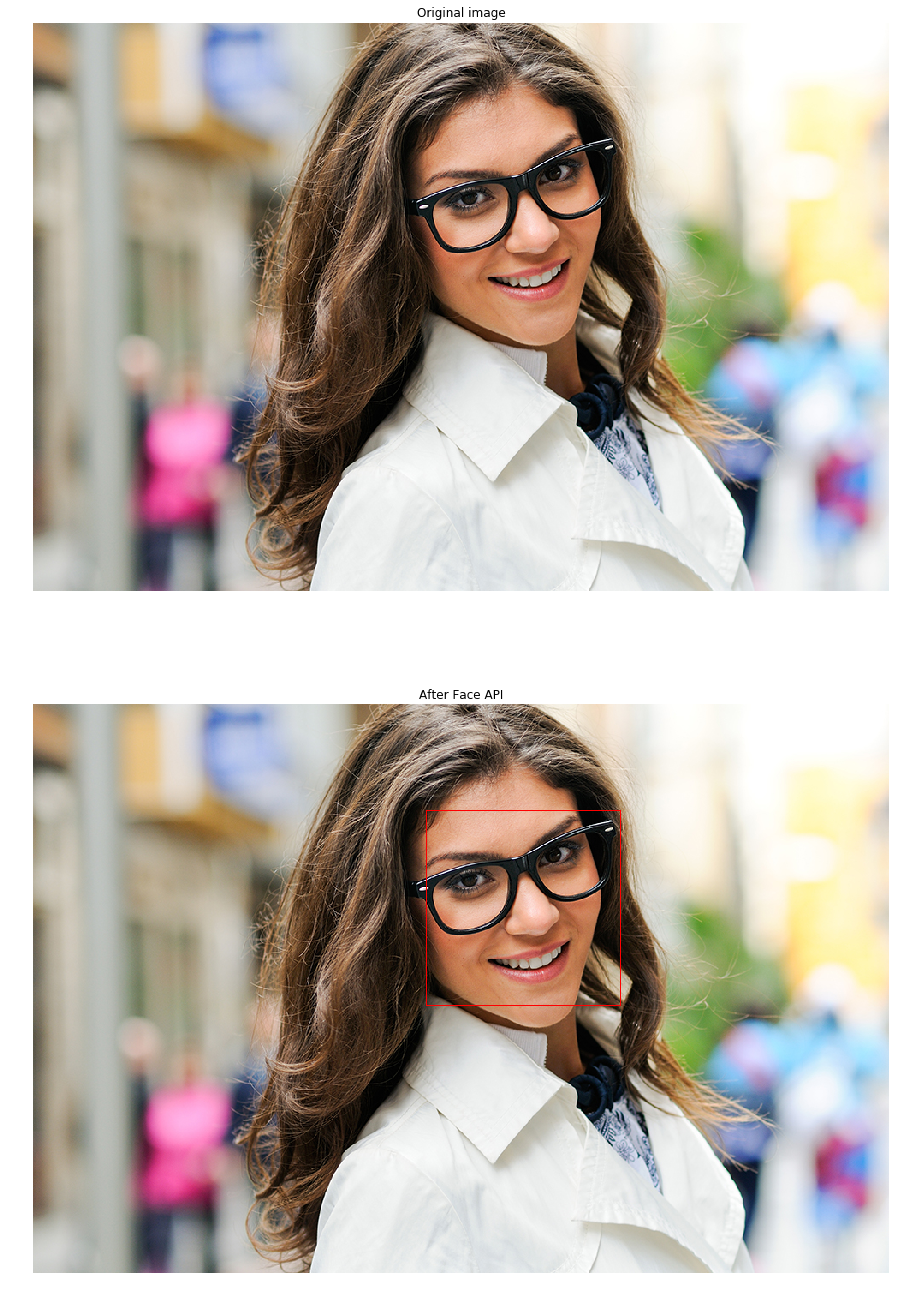

In [91]:
## Convert width height to a point in a rectangle
def getRectangle(faceDictionary):
    rect = faceDictionary['faceRectangle']
    left = rect['left']
    top = rect['top']
    bottom = left + rect['height']
    right = top + rect['width']
    return ((left, top), (bottom, right))

## Display image from URL
def open_url(url):
    return io.BytesIO(urlopen(url).read())

## Prepare original image from URL
origin_img = Image.open(open_url(img_url))

## Prepare image with the result of Face API
### Download the image from the url
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))

### For each face returned use the face rectangle and draw a red box.
draw = ImageDraw.Draw(img)
for face in faces:
    draw.rectangle(getRectangle(face), outline='red')

## display those images
fig, (axL, axR) = plt.subplots(2, 1, figsize=(23,23))

axL.imshow(np.array(origin_img))
axL.axis('off')
axL.set_title(u'Original image')

axR.imshow(np.array(img))
axR.axis('off')
axR.set_title(u'After Face API')
#img.show() #Use in case of displaying with other separate browser